<a href="https://colab.research.google.com/github/Suiii71/Car-Damage-Classification-Repair-Cost-Prediction-A-Machine-Learning-Approach/blob/main/Repair_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error,
                             mean_squared_error,
                             r2_score,
                             classification_report,
                             confusion_matrix,
                             accuracy_score)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Car_Damage_Project/CarDamage_Cost.csv"
df = pd.read_csv(path)
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

print("Dataset loaded:", df.shape)
print(df.head())

Dataset loaded: (1594, 6)
          image       classes   brand   model   action  repair_cost
0  image/0.jpeg       unknown   Honda    CR-V     none           45
1  image/1.jpeg     head_lamp    Ford   Focus   repair          257
2  image/2.jpeg  door_scratch  Nissan  Altima   repair          378
3  image/3.jpeg     head_lamp  Nissan  Sentra  replace          740
4  image/4.jpeg       unknown  Nissan  Sentra     none           43


In [ ]:
encoders = {}
cat_cols = ["classes", "brand", "model", "action"]

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

X = df[["classes", "brand", "model", "action"]]
y = df["repair_cost"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
def cost_to_class(val):
    if val < 200:
        return "low"
    elif val < 500:
        return "medium"
    else:
        return "high"

In [ ]:
def evaluate_model(name, y_test, y_pred, classes=["low", "medium", "high"]):
    print("\n")
    print(f"MODEL: {name}")
    print("\n")

    #Regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"MAE  = {mae:.3f}")
    print(f"RMSE = {rmse:.3f}")
    print(f"R²   = {r2:.4f}")

    #Convert regression outputs & true values into cost classes
    y_true_cls = np.array([cost_to_class(v) for v in y_test])
    y_pred_cls = np.array([cost_to_class(v) for v in y_pred])

    #Classification metrics on cost categories
    acc = accuracy_score(y_true_cls, y_pred_cls)
    print(f"\nCost Accuracy = {acc:.4f}\n")

    print("Classification report (cost categories):")
    print(classification_report(y_true_cls, y_pred_cls))

    #Confusion matrix
    cm = confusion_matrix(y_true_cls, y_pred_cls, labels=classes)

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=classes,
        yticklabels=classes
    )
    plt.title(f"{name} — Confusion Matrix (cost classes)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



MODEL: Decision Tree


MAE  = 58.263
RMSE = 97.441
R²   = 0.7527

Cost Accuracy = 0.8715

Classification report (cost categories):
              precision    recall  f1-score   support

        high       0.67      0.43      0.52        28
         low       0.98      0.93      0.96       223
      medium       0.65      0.85      0.74        68

    accuracy                           0.87       319
   macro avg       0.77      0.74      0.74       319
weighted avg       0.88      0.87      0.87       319



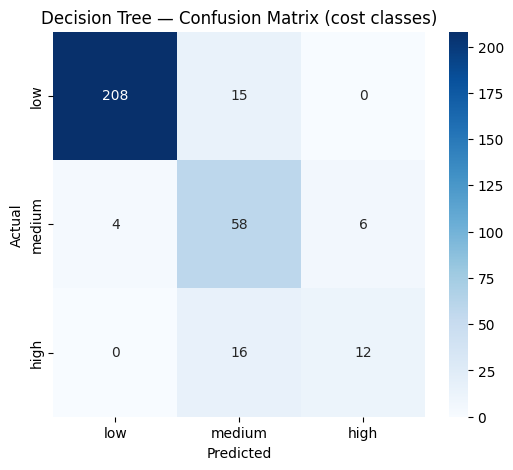

In [ ]:
dt = DecisionTreeRegressor(
    max_depth=12,
    random_state=42
)

dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

evaluate_model("Decision Tree", y_test, dt_pred)



MODEL: Random Forest


MAE  = 56.688
RMSE = 94.110
R²   = 0.7694

Cost Accuracy = 0.8746

Classification report (cost categories):
              precision    recall  f1-score   support

        high       0.67      0.43      0.52        28
         low       0.99      0.93      0.96       223
      medium       0.65      0.88      0.75        68

    accuracy                           0.87       319
   macro avg       0.77      0.75      0.74       319
weighted avg       0.89      0.87      0.88       319



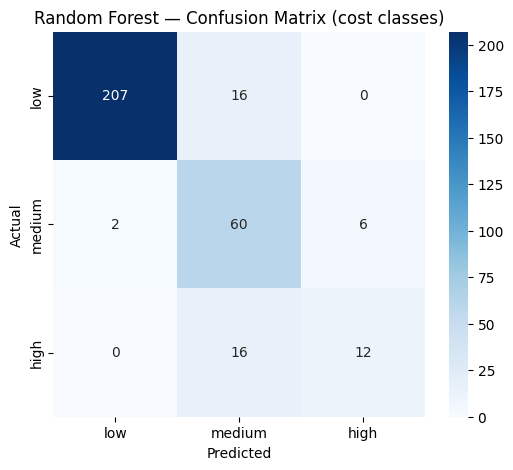

In [ ]:
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

evaluate_model("Random Forest", y_test, rf_pred)



MODEL: KNN


MAE  = 61.479
RMSE = 101.766
R²   = 0.7303

Cost Accuracy = 0.8652

Classification report (cost categories):
              precision    recall  f1-score   support

        high       0.53      0.36      0.43        28
         low       1.00      0.93      0.96       223
      medium       0.64      0.85      0.73        68

    accuracy                           0.87       319
   macro avg       0.72      0.71      0.71       319
weighted avg       0.88      0.87      0.87       319



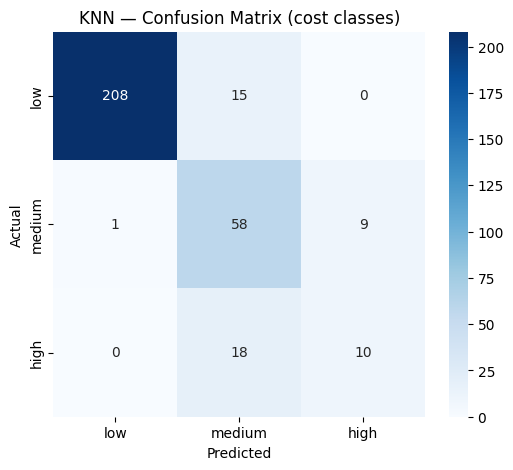

In [ ]:
knn = KNeighborsRegressor(
    n_neighbors=5
)

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

evaluate_model("KNN", y_test, knn_pred)



MODEL: XGBoost


MAE  = 56.626
RMSE = 93.461
R²   = 0.7725

Cost Accuracy = 0.8777

Classification report (cost categories):
              precision    recall  f1-score   support

        high       0.67      0.43      0.52        28
         low       0.99      0.94      0.96       223
      medium       0.66      0.87      0.75        68

    accuracy                           0.88       319
   macro avg       0.77      0.74      0.74       319
weighted avg       0.89      0.88      0.88       319



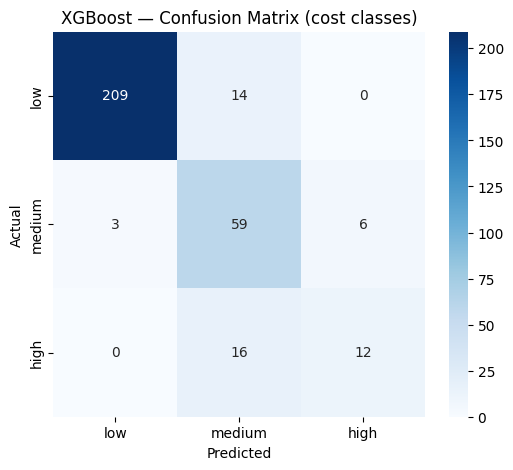

In [ ]:
xgb = XGBRegressor(
    n_estimators=400,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=2,
    random_state=42,
    tree_method="hist"
)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

evaluate_model("XGBoost", y_test, xgb_pred)

In [ ]:
# Store results in a list
results = []

def add_result(model_name, y_test, y_pred):
    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred)

    # Convert cost → class
    y_true_cls = np.array([cost_to_class(v) for v in y_test])
    y_pred_cls = np.array([cost_to_class(v) for v in y_pred])

    acc = accuracy_score(y_true_cls, y_pred_cls)

    results.append([model_name, mae, rmse, r2, acc])

In [ ]:
add_result("Decision Tree", y_test, dt_pred)
add_result("Random Forest", y_test, rf_pred)
add_result("KNN", y_test, knn_pred)
add_result("XGBoost", y_test, xgb_pred)

In [ ]:
comparison_df = pd.DataFrame(
    results,
    columns=["Model", "MAE", "RMSE", "R²", "Cost Accuracy"]
)

comparison_df

,Model,MAE,RMSE,R²,Cost Accuracy
0,Decision Tree,58.263240,97.441446,0.752747,0.871473
1,Random Forest,56.688386,94.109596,0.769367,0.874608
2,KNN,61.478997,101.766024,0.730313,0.865204
3,XGBoost,56.625748,93.461039,0.772535,0.877743
